In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("wine.csv")

In [3]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.shape

(178, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
df.isnull().sum()

,0
Type,0
Alcohol,0
Malic,0
Ash,0
Alcalinity,0
Magnesium,0
Phenols,0
Flavanoids,0
Nonflavanoids,0
Proanthocyanins,0


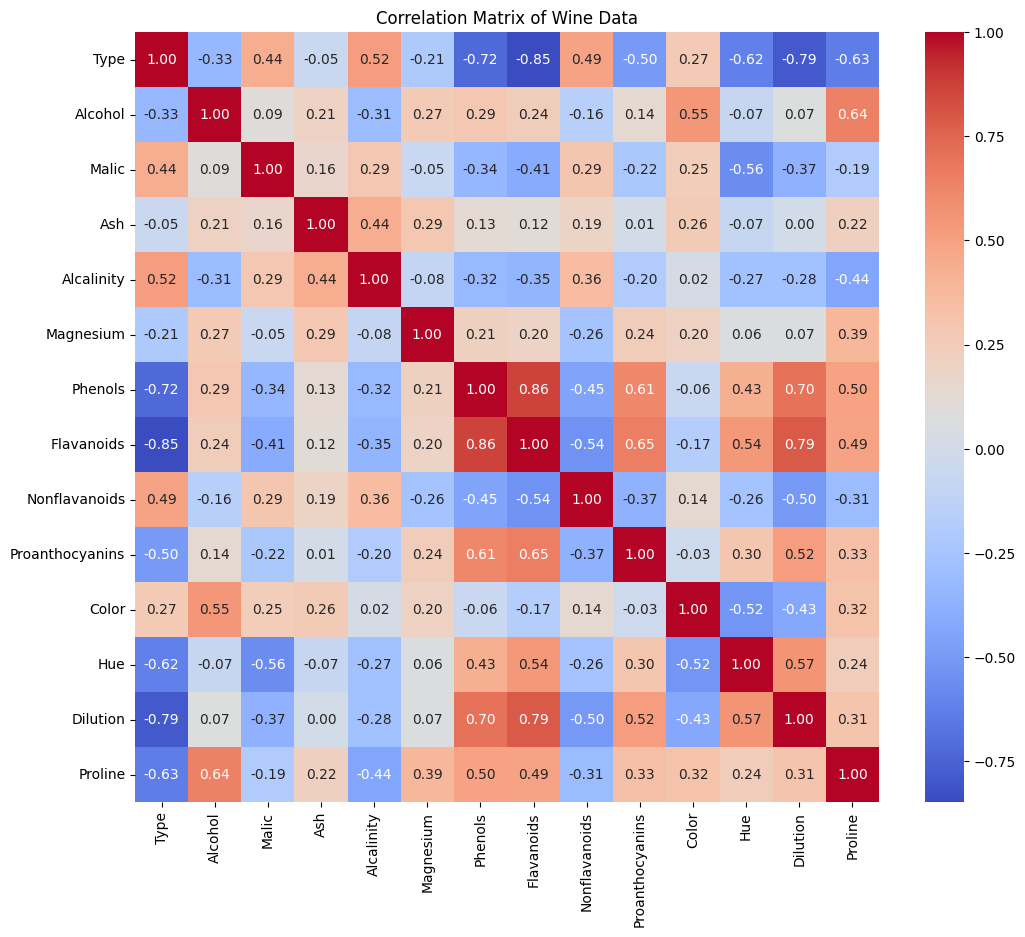

In [8]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wine Data')
plt.show()

In [10]:
# Calculate the correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.65
to_drop = [column for column in upper.columns if any(upper[column] > 0.65)]

# Drop features
df_dropped = df.drop(to_drop, axis=1)

print("Original shape:", df.shape)
print("Shape after dropping correlated columns:", df_dropped.shape)
print("Columns dropped:", to_drop)
display(df_dropped.head())

Original shape: (178, 14)
Shape after dropping correlated columns: (178, 10)
Columns dropped: ['Phenols', 'Flavanoids', 'Proanthocyanins', 'Dilution']


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Nonflavanoids,Color,Hue,Proline
0,1,14.23,1.71,2.43,15.6,127,0.28,5.64,1.04,1065
1,1,13.20,1.78,2.14,11.2,100,0.26,4.38,1.05,1050
2,1,13.16,2.36,2.67,18.6,101,0.30,5.68,1.03,1185
3,1,14.37,1.95,2.50,16.8,113,0.24,7.80,0.86,1480
4,1,13.24,2.59,2.87,21.0,118,0.39,4.32,1.04,735


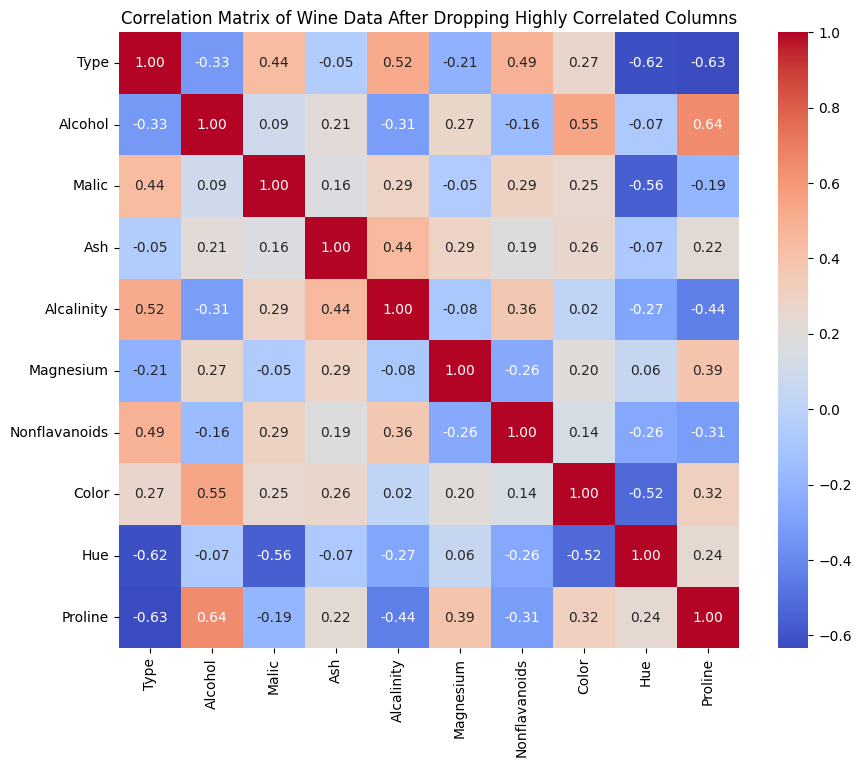

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_dropped.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wine Data After Dropping Highly Correlated Columns')
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = df_dropped.drop('Type', axis=1)
y = df_dropped['Type']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled array back to a DataFrame for easier viewing (optional)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Original data (first 5 rows):")
display(X.head())
print("\nStandardized data (first 5 rows):")
display(X_scaled_df.head())

Original data (first 5 rows):


,Alcohol,Malic,Ash,Alcalinity,Magnesium,Nonflavanoids,Color,Hue,Proline
0,14.23,1.71,2.43,15.6,127,0.28,5.64,1.04,1065
1,13.20,1.78,2.14,11.2,100,0.26,4.38,1.05,1050
2,13.16,2.36,2.67,18.6,101,0.30,5.68,1.03,1185
3,14.37,1.95,2.50,16.8,113,0.24,7.80,0.86,1480
4,13.24,2.59,2.87,21.0,118,0.39,4.32,1.04,735



Standardized data (first 5 rows):


,Alcohol,Malic,Ash,Alcalinity,Magnesium,Nonflavanoids,Color,Hue,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,-0.659563,0.251717,0.362177,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,-0.820719,-0.293321,0.406051,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,-0.498407,0.269020,0.318304,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,-0.981875,1.186068,-0.427544,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.226796,-0.319276,0.362177,-0.037874


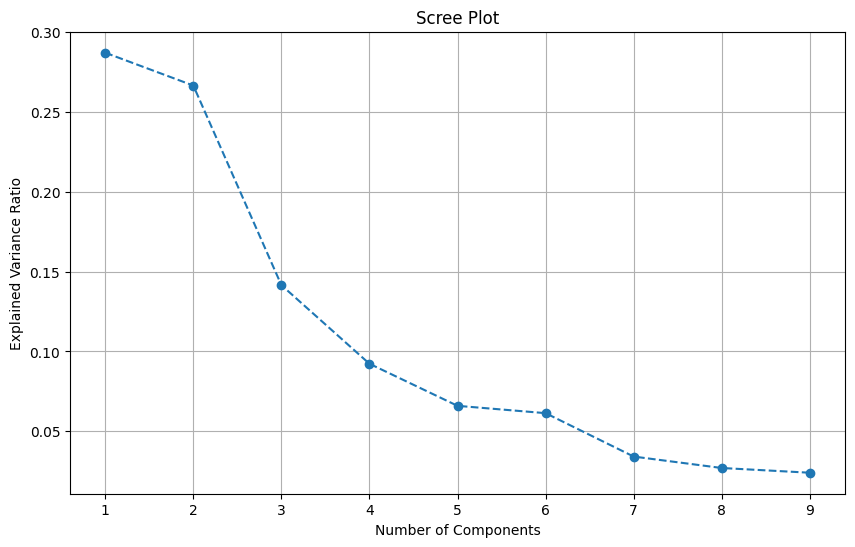

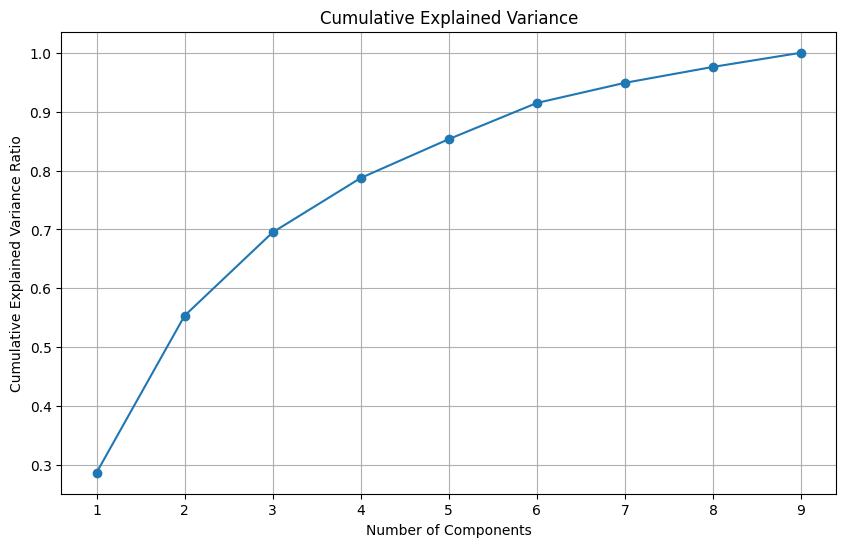

In [13]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()

# Cumulative variance plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid(True)
plt.show()

In [14]:
# Choose the number of components (e.g., to retain 95% variance)
# From the cumulative variance plot, approximately 8 components retain over 95% variance.
n_components = 8

# Apply PCA with the chosen number of components
pca = PCA(n_components=n_components)
X_pca_final = pca.fit_transform(X_scaled)

print(f"Shape of the data after PCA with {n_components} components: {X_pca_final.shape}")

Shape of the data after PCA with 8 components: (178, 8)


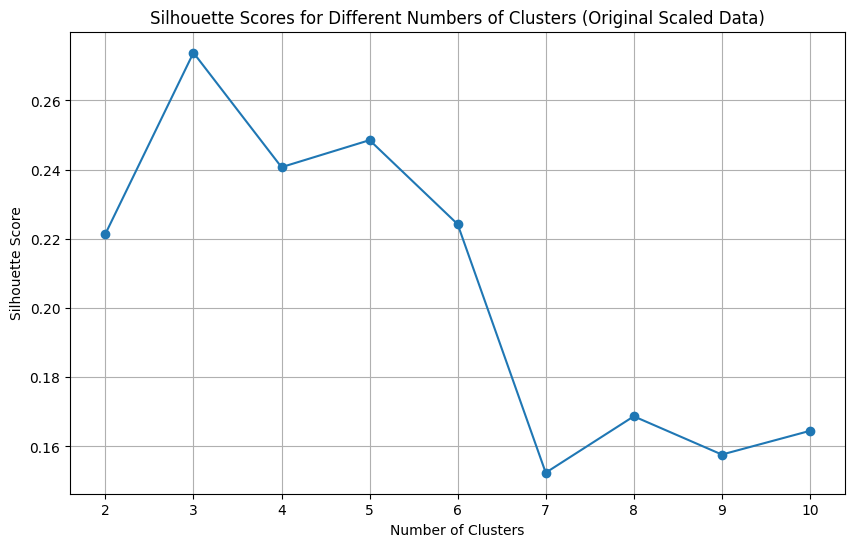

Optimal number of clusters based on silhouette score (Original Scaled Data): 3


In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply K-Means clustering for a range of cluster numbers on the original scaled data
silhouette_scores_original = []
k_range = range(2, 11)  # Choose a range of cluster numbers to evaluate

for n_clusters in k_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels_original = kmeans.fit_predict(X_scaled)
    silhouette_avg_original = silhouette_score(X_scaled, cluster_labels_original)
    silhouette_scores_original.append(silhouette_avg_original)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores_original, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters (Original Scaled Data)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Find the number of clusters with the highest silhouette score
optimal_n_clusters_original = k_range[np.argmax(silhouette_scores_original)]
print(f"Optimal number of clusters based on silhouette score (Original Scaled Data): {optimal_n_clusters_original}")

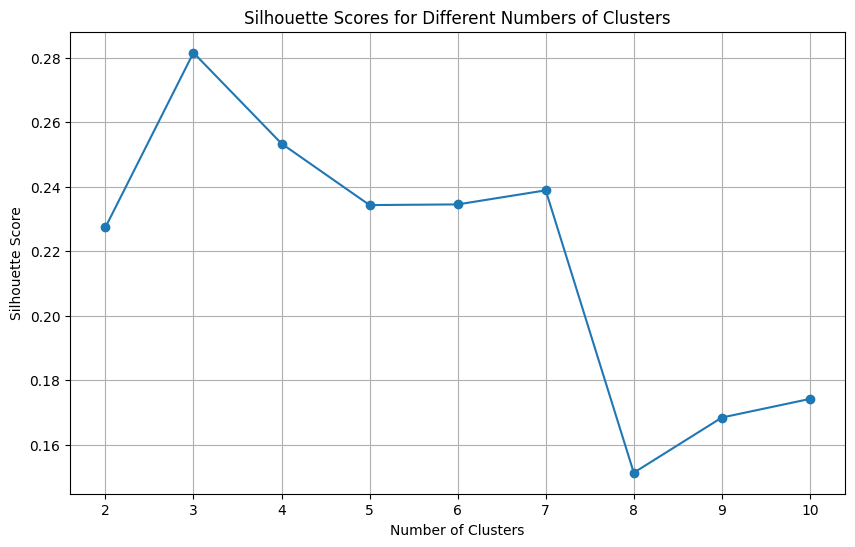

Optimal number of clusters based on silhouette score: 3


In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply K-Means clustering for a range of cluster numbers
silhouette_scores = []
k_range = range(2, 11)  # Choose a range of cluster numbers to evaluate

for n_clusters in k_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_pca_final)
    silhouette_avg = silhouette_score(X_pca_final, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Find the number of clusters with the highest silhouette score
optimal_n_clusters = k_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on silhouette score: {optimal_n_clusters}")

Distribution of True Types within Clusters (Original Scaled Data):


True_Type,1,2,3
Cluster_Original,,,
0,58.0,6.0,1.0
1,0.0,61.0,1.0
2,1.0,4.0,46.0



Distribution of True Types within Clusters (PCA-Transformed Data):


True_Type,1,2,3
Cluster_PCA,,,
0,1.0,4.0,46.0
1,0.0,61.0,1.0
2,58.0,6.0,1.0


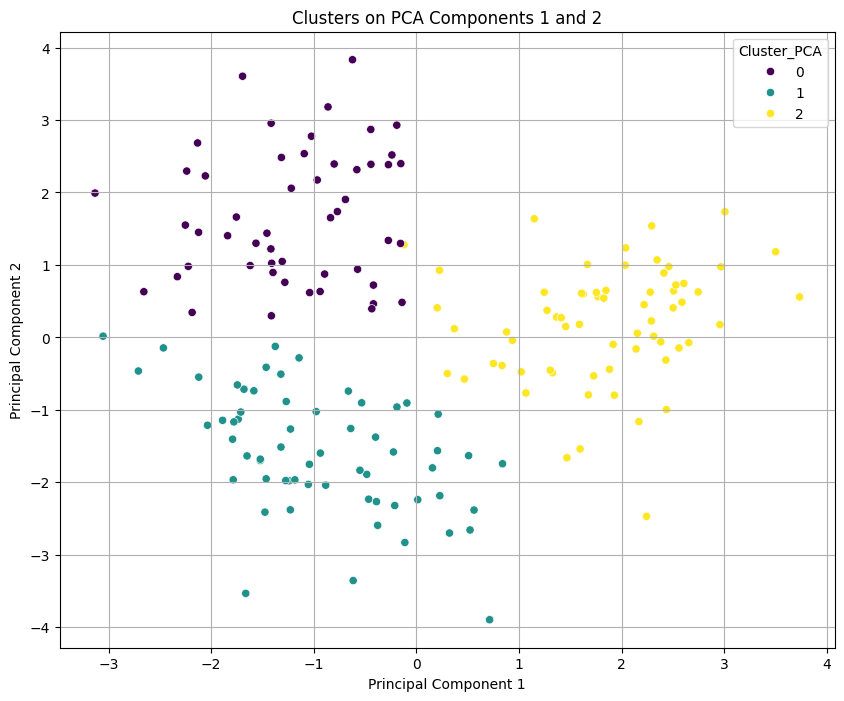

In [17]:
# Apply K-Means clustering with the optimal number of clusters (3) to the original scaled data
kmeans_original = KMeans(n_clusters=optimal_n_clusters_original, random_state=42, n_init=10)
cluster_labels_original = kmeans_original.fit_predict(X_scaled)

# Apply K-Means clustering with the optimal number of clusters (3) to the PCA-transformed data
kmeans_pca = KMeans(n_clusters=optimal_n_clusters, random_state=42, n_init=10)
cluster_labels_pca = kmeans_pca.fit_predict(X_pca_final)

# Add cluster labels to the original and PCA dataframes for analysis
X_scaled_df_clustered = X_scaled_df.copy()
X_scaled_df_clustered['Cluster_Original'] = cluster_labels_original
X_scaled_df_clustered['True_Type'] = y.values # Add true labels for comparison

X_pca_df_clustered = pd.DataFrame(X_pca_final, columns=[f'PC{i+1}' for i in range(X_pca_final.shape[1])])
X_pca_df_clustered['Cluster_PCA'] = cluster_labels_pca
X_pca_df_clustered['True_Type'] = y.values # Add true labels for comparison

# Compare the distribution of true types within each cluster for original data
print("Distribution of True Types within Clusters (Original Scaled Data):")
display(X_scaled_df_clustered.groupby('Cluster_Original')['True_Type'].value_counts().unstack().fillna(0))

# Compare the distribution of true types within each cluster for PCA data
print("\nDistribution of True Types within Clusters (PCA-Transformed Data):")
display(X_pca_df_clustered.groupby('Cluster_PCA')['True_Type'].value_counts().unstack().fillna(0))

# You can also visualize the clusters in 2D or 3D if desired (e.g., using the first few PCA components)
# For example, visualizing the clusters from PCA data on the first two principal components:
if X_pca_final.shape[1] >= 2:
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=X_pca_df_clustered['PC1'], y=X_pca_df_clustered['PC2'], hue='Cluster_PCA', palette='viridis', data=X_pca_df_clustered, legend='full')
    plt.title('Clusters on PCA Components 1 and 2')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.show()

# You can perform further analysis like comparing cluster centroids or exploring feature distributions within clusters.